# Data Prep

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import sys
sys.path.append("/home/paperspace/fastai")

In [3]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
torch.cuda.set_device(0)

In [5]:
ls

DigitRecognizer.ipynb       sample_submission.csv  submission4.csv
digpics/                    submission2.csv        submission.csv
Dog Breed Classifier.ipynb  submission3.csv        unsortedsubmission.csv


In [6]:
PATH="digpics/"
sz=28
arch=resnext101_64
bs=58

# Create Images from CSV

In [7]:
from PIL import Image
import numpy as np
import pandas as pd

df=pd.read_csv('digpics/train.csv')



In [8]:
print(len(df.values))

42000


In [14]:
#this is done - don't run me!
#for i in range (0, len(df.values)):
    label=str(df.values[i][0])
    array = np.zeros([28,28,3],dtype=np.uint8)
    for j in range(0,28*28):
        array[j//28, j%28]=[df.values[i][j],df.values[i][j],df.values[i][j]]
    FNAME = label+'.dig.'+str(i)+'.jpg'
    img=Image.fromarray(array)
    img.save(FNAME)
    if (i % 1000==0): print("created "+str(i)+ " images");

created 0 images
created 1000 images
created 2000 images
created 3000 images
created 4000 images
created 5000 images
created 6000 images
created 7000 images
created 8000 images
created 9000 images
created 10000 images
created 11000 images
created 12000 images
created 13000 images
created 14000 images
created 15000 images
created 16000 images
created 17000 images
created 18000 images
created 19000 images
created 20000 images
created 21000 images
created 22000 images
created 23000 images
created 24000 images
created 25000 images
created 26000 images
created 27000 images
created 28000 images
created 29000 images
created 30000 images
created 31000 images
created 32000 images
created 33000 images
created 34000 images
created 35000 images
created 36000 images
created 37000 images
created 38000 images
created 39000 images
created 40000 images
created 41000 images


# Look at Images

In [9]:
files = !ls {PATH}valid/6
files

['6.dig.10294.jpg',
 '6.dig.10452.jpg',
 '6.dig.10883.jpg',
 '6.dig.11100.jpg',
 '6.dig.11300.jpg',
 '6.dig.11337.jpg',
 '6.dig.11457.jpg',
 '6.dig.11465.jpg',
 '6.dig.11502.jpg',
 '6.dig.11517.jpg',
 '6.dig.11631.jpg',
 '6.dig.11667.jpg',
 '6.dig.11685.jpg',
 '6.dig.11782.jpg',
 '6.dig.11927.jpg',
 '6.dig.11962.jpg',
 '6.dig.11996.jpg',
 '6.dig.12087.jpg',
 '6.dig.12241.jpg',
 '6.dig.12283.jpg',
 '6.dig.12298.jpg',
 '6.dig.12353.jpg',
 '6.dig.12534.jpg',
 '6.dig.12561.jpg',
 '6.dig.12624.jpg',
 '6.dig.1266.jpg',
 '6.dig.12856.jpg',
 '6.dig.12876.jpg',
 '6.dig.12959.jpg',
 '6.dig.12967.jpg',
 '6.dig.1316.jpg',
 '6.dig.13179.jpg',
 '6.dig.13242.jpg',
 '6.dig.1344.jpg',
 '6.dig.13537.jpg',
 '6.dig.1354.jpg',
 '6.dig.13578.jpg',
 '6.dig.13661.jpg',
 '6.dig.13742.jpg',
 '6.dig.13815.jpg',
 '6.dig.13817.jpg',
 '6.dig.13892.jpg',
 '6.dig.1390.jpg',
 '6.dig.13917.jpg',
 '6.dig.13947.jpg',
 '6.dig.14255.jpg',
 '6.dig.14313.jpg',
 '6.dig.14391.jpg',
 '6.dig.1487.jpg',
 '6.dig.15078.jpg',
 '6.di

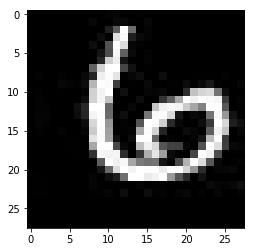

In [42]:
img = plt.imread(f'{PATH}valid/6/{files[10]}')
plt.imshow(img);

In [10]:
print(len(files))

422


# Move some of train into valid

In [26]:
#i've been done don't run me again!
import shutil
import random
import os

newpath = PATH+"valid/" 
if not os.path.exists(newpath):
    os.makedirs(newpath)


#for file in files:
    x = random.randint(1,101)
    if x > 80: 
        shutil.move(PATH+"train/"+file, PATH+"valid/"+file)



In [31]:
files = !ls {PATH}train
print(len(files))
files2 = !ls {PATH}valid
print(len(files2))
print(len(files)/42000.0)
print(len(files2)/42000.0)

33236
8764
0.7913333333333333
0.20866666666666667


In [42]:
trainfiles = !ls {PATH}train
trainfiles[0]

'0.dig.10010.jpg'

In [45]:
for file in trainfiles:
    label = file[0]
    newpath = PATH+"train/"+label+"/"
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    shutil.move(PATH+"train/"+file, newpath+file)

In [46]:
!ls {PATH}train

0  1  2  3  4  5  6  7	8  9


In [49]:
validfiles = !ls {PATH}valid
validfiles[0]

'0.dig.10007.jpg'

In [50]:
for file in validfiles:
    label = file[0]
    newpath = PATH+"valid/"+label+"/"
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    shutil.move(PATH+"valid/"+file, newpath+file)

In [51]:
!ls {PATH}valid

0  1  2  3  4  5  6  7	8  9


# Set up Test Folder

In [15]:
!ls {PATH}

models	test  test.csv	tmp  train  train.csv  valid


In [24]:
df=pd.read_csv('digpics/test.csv')
len(df.values)

28000

In [25]:
!rm -r {PATH}test

In [26]:
!ls {PATH}

models	test.csv  tmp  train  train.csv  valid


In [27]:
newpath = PATH+"test/"
if not os.path.exists(newpath):
        os.makedirs(newpath)
print(newpath)

digpics/test/


In [28]:
def makestr(i):
    numstr = str(i)
    while len(numstr)<6:
        numstr = "0"+numstr
    return numstr

for i in range (0, len(df.values)):
    array = np.zeros([28,28,3],dtype=np.uint8)
    for j in range(0,28*28):
        array[j//28, j%28]=[df.values[i][j],df.values[i][j],df.values[i][j]]
    num = makestr(i)
    FNAME = 'dig.'+num+'.jpg'
    img=Image.fromarray(array)
    img.save(PATH+"test/"+FNAME)
    if (i % 1000==0): print("created "+str(i)+ " images");

created 0 images
created 1000 images
created 2000 images
created 3000 images
created 4000 images
created 5000 images
created 6000 images
created 7000 images
created 8000 images
created 9000 images
created 10000 images
created 11000 images
created 12000 images
created 13000 images
created 14000 images
created 15000 images
created 16000 images
created 17000 images
created 18000 images
created 19000 images
created 20000 images
created 21000 images
created 22000 images
created 23000 images
created 24000 images
created 25000 images
created 26000 images
created 27000 images


In [31]:
!ls {PATH}test

dig.000000.jpg	dig.005600.jpg	dig.011200.jpg	dig.016800.jpg	dig.022400.jpg
dig.000001.jpg	dig.005601.jpg	dig.011201.jpg	dig.016801.jpg	dig.022401.jpg
dig.000002.jpg	dig.005602.jpg	dig.011202.jpg	dig.016802.jpg	dig.022402.jpg
dig.000003.jpg	dig.005603.jpg	dig.011203.jpg	dig.016803.jpg	dig.022403.jpg
dig.000004.jpg	dig.005604.jpg	dig.011204.jpg	dig.016804.jpg	dig.022404.jpg
dig.000005.jpg	dig.005605.jpg	dig.011205.jpg	dig.016805.jpg	dig.022405.jpg
dig.000006.jpg	dig.005606.jpg	dig.011206.jpg	dig.016806.jpg	dig.022406.jpg
dig.000007.jpg	dig.005607.jpg	dig.011207.jpg	dig.016807.jpg	dig.022407.jpg
dig.000008.jpg	dig.005608.jpg	dig.011208.jpg	dig.016808.jpg	dig.022408.jpg
dig.000009.jpg	dig.005609.jpg	dig.011209.jpg	dig.016809.jpg	dig.022409.jpg
dig.000010.jpg	dig.005610.jpg	dig.011210.jpg	dig.016810.jpg	dig.022410.jpg
dig.000011.jpg	dig.005611.jpg	dig.011211.jpg	dig.016811.jpg	dig.022411.jpg
dig.000012.jpg	dig.005612.jpg	dig.011212.jpg	dig.016812.jpg	dig.022412.jpg
dig.000013.jpg	dig.005613

dig.002151.jpg	dig.007751.jpg	dig.013351.jpg	dig.018951.jpg	dig.024551.jpg
dig.002152.jpg	dig.007752.jpg	dig.013352.jpg	dig.018952.jpg	dig.024552.jpg
dig.002153.jpg	dig.007753.jpg	dig.013353.jpg	dig.018953.jpg	dig.024553.jpg
dig.002154.jpg	dig.007754.jpg	dig.013354.jpg	dig.018954.jpg	dig.024554.jpg
dig.002155.jpg	dig.007755.jpg	dig.013355.jpg	dig.018955.jpg	dig.024555.jpg
dig.002156.jpg	dig.007756.jpg	dig.013356.jpg	dig.018956.jpg	dig.024556.jpg
dig.002157.jpg	dig.007757.jpg	dig.013357.jpg	dig.018957.jpg	dig.024557.jpg
dig.002158.jpg	dig.007758.jpg	dig.013358.jpg	dig.018958.jpg	dig.024558.jpg
dig.002159.jpg	dig.007759.jpg	dig.013359.jpg	dig.018959.jpg	dig.024559.jpg
dig.002160.jpg	dig.007760.jpg	dig.013360.jpg	dig.018960.jpg	dig.024560.jpg
dig.002161.jpg	dig.007761.jpg	dig.013361.jpg	dig.018961.jpg	dig.024561.jpg
dig.002162.jpg	dig.007762.jpg	dig.013362.jpg	dig.018962.jpg	dig.024562.jpg
dig.002163.jpg	dig.007763.jpg	dig.013363.jpg	dig.018963.jpg	dig.024563.jpg
dig.002164.jpg	dig.007764

# Initial Model

In [60]:
!ls {PATH}

test  test.csv	train  train.csv  valid


In [14]:
!ls {PATH}valid

0  1  2  3  4  5  6  7	8  9


In [11]:
sz=28
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 67/67 [00:07<00:00,  8.66it/s]


In [12]:
learn.fit(0.01,3)

epoch      trn_loss   val_loss   accuracy                    
    0      0.2644     0.177965   0.947836  
    1      0.213508   0.156112   0.952515                    
    2      0.169964   0.147212   0.957661                    



[array([0.14721]), 0.9576608187134503]

# Augment

In [15]:
lrf = learn.lr_find()

 74%|███████▍  | 437/590 [00:07<00:02, 54.85it/s, loss=0.516]


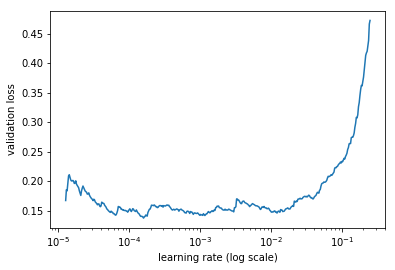

In [16]:
learn.sched.plot()

In [17]:
learn.precompute=False
learn.fit(5e-3,5,cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.138967   0.109421   0.963743  
    1      0.126682   0.10687    0.964444                    
    2      0.122221   0.104906   0.965146                    
    3      0.116642   0.104142   0.966316                    
    4      0.117474   0.101208   0.968187                    



[array([0.10121]), 0.9681871345029239]

In [18]:
sz=32
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name='test')
learn.set_data(data)
learn.fit(1e-2,3,cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.178759   0.128211   0.960468  
    1      0.155962   0.114897   0.962573                    
    2      0.15534    0.105396   0.966316                    



[array([0.1054]), 0.9663157894876269]

In [19]:
lrf = learn.lr_find()

 72%|███████▏  | 427/590 [00:49<00:19,  8.56it/s, loss=0.381]

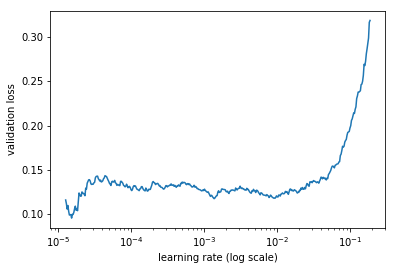

In [20]:
learn.sched.plot()

In [21]:
lr = np.array([5e-4,1e-3,5e-3])
learn.unfreeze()
learn.fit(lr,3,cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                     
    0      0.110641   0.052291   0.98269   
    1      0.065826   0.035216   0.990175                     
    2      0.033129   0.030701   0.990643                     
    3      0.04146    0.032319   0.990643                     
    4      0.014971   0.035964   0.988304                     
    5      0.012659   0.03042    0.989942                      
    6      0.006158   0.032034   0.988772                      


[array([0.03203]), 0.9887719298245614]

In [22]:
log_preds,y=learn.TTA()
#probs = np.exp(log_preds)
#accuracy(log_preds,y), metrics.log_loss(y,probs)
probs = np.mean(np.exp(log_preds),0)
print("accuracy_np(probs, y):", accuracy_np(probs, y))
print("metrics.log_loss(y, probs):", metrics.log_loss(y, probs))

accuracy_np(probs, y): 0.9887719298245614    
metrics.log_loss(y, probs): 0.032033630880973885


In [23]:
preds=np.argmax(probs, axis=1)
probs = probs[:,1]

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,preds)

[[421   0   0   0   0   0   1   0   0   1]
 [  0 489   0   0   0   1   0   6   0   0]
 [  0   1 427   0   0   0   0   0   2   1]
 [  0   0   0 431   0   0   0   0   2   0]
 [  0   1   0   0 389   0   1   3   0   5]
 [  0   1   0   2   0 369   0   0   1   0]
 [  0   0   0   0   2   1 417   0   1   1]
 [  0   2   1   0   1   0   0 441   0   1]
 [  2   0   0   1   0   1   0   0 404   2]
 [  0   0   0   0   2   0   0   1   0 439]]


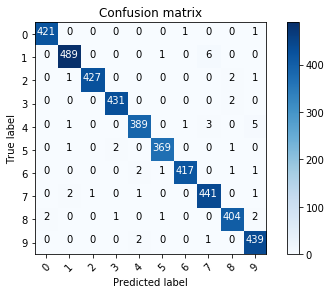

In [25]:
plot_confusion_matrix(cm, data.classes)

In [26]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0],4,replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds==data.val_y)==is_correct)

In [27]:
def plot_val_with_title(idxs,title):
    imgs=np.stack([data.val_ds[x][0] for x in idxs])
    title_probs=[probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs),rows=1, titles=title_probs)

In [28]:
def most_by_mask(mask, mult):
    idxs=np.where(mask)[0]
    return idxs[np.argsort(mult*probs[idxs])[:4]]

def most_by_correct(y, is_correct):
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds==data.val_y)==is_correct & (data.val_y==y),mult)

Correctly classified


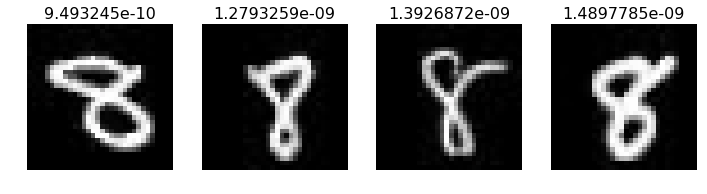

In [29]:
plot_val_with_title(most_by_correct(8,True), "Correctly classified")

Most uncertain


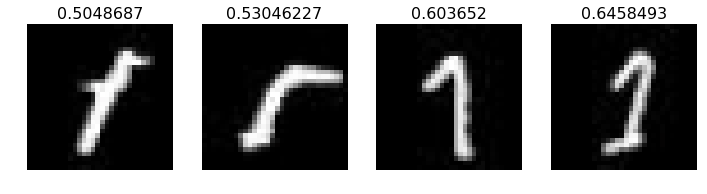

In [30]:
most_uncertain=np.argsort(np.abs(probs-0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain")

In [31]:
learn.save("modelo")

# rearrange train, validation sets

In [8]:
#move all valid back into train
validfolders = !ls {PATH}valid

import shutil

for folder in validfolders:
    newpath = PATH+"/valid/"+folder
    validfiles = !ls {newpath}
    for file in validfiles:
        shutil.move(PATH+"valid/"+folder+"/"+file, PATH+"train/"+folder+"/"+file)
    

#randomly move train into valid

#print(trainfolders)
trainfolders = !ls {PATH}train
for folder in trainfolders:
    newpath = PATH+"/train/"+folder
    trainfiles = !ls {newpath}
    for file in trainfiles:
        if random.randint(1,100)<11: 
            shutil.move(PATH+"train/"+folder+"/"+file, PATH+"valid/"+folder+"/"+file)
            print("moved")


moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
move

moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
move

moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
moved
move

# Look at predictions and submit

In [11]:
learn = ConvLearner.pretrained(arch, data, precompute=False)
learn.load("rerunmodel")

In [32]:
predict = learn.predict(is_test=True)

In [33]:
data.test_ds.fnames

['test/dig.017612.jpg',
 'test/dig.015728.jpg',
 'test/dig.019426.jpg',
 'test/dig.014204.jpg',
 'test/dig.000433.jpg',
 'test/dig.015590.jpg',
 'test/dig.022263.jpg',
 'test/dig.010915.jpg',
 'test/dig.012733.jpg',
 'test/dig.026022.jpg',
 'test/dig.009661.jpg',
 'test/dig.002082.jpg',
 'test/dig.015943.jpg',
 'test/dig.009072.jpg',
 'test/dig.023970.jpg',
 'test/dig.009482.jpg',
 'test/dig.024160.jpg',
 'test/dig.001063.jpg',
 'test/dig.027393.jpg',
 'test/dig.007298.jpg',
 'test/dig.021416.jpg',
 'test/dig.020399.jpg',
 'test/dig.021695.jpg',
 'test/dig.009369.jpg',
 'test/dig.000496.jpg',
 'test/dig.017439.jpg',
 'test/dig.012114.jpg',
 'test/dig.007471.jpg',
 'test/dig.026561.jpg',
 'test/dig.001184.jpg',
 'test/dig.005817.jpg',
 'test/dig.019885.jpg',
 'test/dig.013212.jpg',
 'test/dig.014915.jpg',
 'test/dig.018706.jpg',
 'test/dig.010158.jpg',
 'test/dig.021215.jpg',
 'test/dig.017658.jpg',
 'test/dig.010932.jpg',
 'test/dig.023939.jpg',
 'test/dig.022660.jpg',
 'test/dig.00642

In [36]:
data.test_ds.fnames[0][9:-4]

'017612'

In [37]:
preds = np.exp(predict)
predlabels = np.argmax(preds, axis=1)
predlabels

array([4, 3, 3, ..., 7, 1, 7])

In [38]:
ans =[]
for i in range(0, 28000):
    ans.append([data.test_ds.fnames[i][9:-4],predlabels[i]])
for i in range(0,len(ans)):
    ans[i][0]=int(ans[i][0])+1

In [39]:
ans

[[17613, 4],
 [15729, 3],
 [19427, 3],
 [14205, 7],
 [434, 2],
 [15591, 2],
 [22264, 9],
 [10916, 1],
 [12734, 0],
 [26023, 9],
 [9662, 6],
 [2083, 6],
 [15944, 1],
 [9073, 6],
 [23971, 1],
 [9483, 6],
 [24161, 3],
 [1064, 0],
 [27394, 7],
 [7299, 0],
 [21417, 1],
 [20400, 0],
 [21696, 6],
 [9370, 0],
 [497, 6],
 [17440, 2],
 [12115, 1],
 [7472, 0],
 [26562, 0],
 [1185, 0],
 [5818, 6],
 [19886, 1],
 [13213, 0],
 [14916, 4],
 [18707, 7],
 [10159, 6],
 [21216, 2],
 [17659, 7],
 [10933, 9],
 [23940, 4],
 [22661, 9],
 [6427, 5],
 [21998, 8],
 [2661, 7],
 [6389, 2],
 [1562, 9],
 [15621, 2],
 [27993, 1],
 [15399, 9],
 [14654, 5],
 [25614, 2],
 [22659, 1],
 [27382, 6],
 [2693, 4],
 [928, 6],
 [9477, 4],
 [17112, 3],
 [17090, 3],
 [19079, 6],
 [1620, 1],
 [17149, 8],
 [7826, 4],
 [12420, 3],
 [2041, 7],
 [22209, 8],
 [1582, 8],
 [22571, 5],
 [691, 2],
 [18957, 8],
 [17363, 5],
 [9441, 8],
 [10356, 0],
 [9763, 7],
 [14214, 6],
 [2383, 6],
 [23397, 1],
 [3287, 0],
 [16455, 0],
 [16202, 3],
 [991

In [40]:
import pandas as pd
df = pd.DataFrame(ans, columns=['ImageId','Label'])
df.sort_values(by='ImageId')

,ImageId,Label
4434,1,2
2370,2,0
20003,3,9
13336,4,0
13916,5,3
21866,6,7
764,7,0
4935,8,3
558,9,0
27449,10,3


In [41]:
df.to_csv('submission5.csv', index=False)

In [42]:
ls

DigitRecognizer.ipynb       submission2.csv  submission.csv
digpics/                    submission3.csv  unsortedsubmission.csv
Dog Breed Classifier.ipynb  submission4.csv
sample_submission.csv       submission5.csv


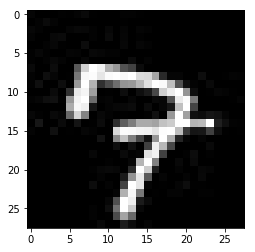

In [54]:
img = plt.imread(f'{PATH}test/{files[5]}')
plt.imshow(img);